In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [4]:
data = raw_data.copy()

In [5]:
data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [6]:
data['view'] = data['view'].map({'No sea view':0, 'Sea view':1})

In [7]:
del data['year']
data

,price,size,view
0,234314.144,643.09,0
1,228581.528,656.22,0
2,281626.336,487.29,1
3,401255.608,1504.75,0
4,458674.256,1275.46,1
...,...,...,...
95,252460.400,549.80,1
96,310522.592,1037.44,0
97,383635.568,1504.75,0
98,225145.248,648.29,0


In [8]:
data.describe()

,price,size,view
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,0.490000
std,77051.727525,297.941951,0.502418
min,154282.128000,479.750000,0.000000
25%,234280.148000,643.330000,0.000000
50%,280590.716000,696.405000,0.000000
75%,335723.696000,1029.322500,1.000000
max,500681.128000,1842.510000,1.000000


In [9]:
y = data['price']
x1 = data[['size', 'view']]

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.44e-46
Time:                        21:09:30   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

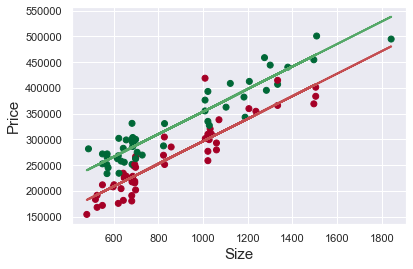

In [11]:
plt.scatter(data['size'],y,c=data['view'], cmap='RdYlGn')
#x2 = 223.03 * data['size']
yhat_no_sea = 7.748e+04 + 218.75 * data['size'] 
yhat_sea = 7.748e+04 + 218.75 * data['size']  + 5.756e+04
fig = plt.plot(data['size'], yhat_no_sea, lw=2, c='r')
fit = plt.plot(data['size'], yhat_sea, lw=2, c = 'g')
plt.xlabel('Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [12]:
x

,const,size,view
0,1.0,643.09,0
1,1.0,656.22,0
2,1.0,487.29,1
3,1.0,1504.75,0
4,1.0,1275.46,1
...,...,...,...
95,1.0,549.80,1
96,1.0,1037.44,0
97,1.0,1504.75,0
98,1.0,648.29,0


In [13]:
new_data = pd.DataFrame({'Const':1,'size':[1504.75,1275.46], 'view':[0,1]})
new_data = new_data[['Const', 'size','view']]
new_data

,Const,size,view
0,1,1504.75,0
1,1,1275.46,1


In [14]:
predictions = results.predict(new_data)
predictions

0    406651.533543
1    414053.712824
dtype: float64

In [15]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0: '3',1:'4'})

,Const,size,view,predictions
3,1,1504.75,0,406651.533543
4,1,1275.46,1,414053.712824
